# Explanatory Data Analysis

### Dataset and its characteristics

The information below is from the Readme.txt file, found in the datasets folder of this repository. It is can also be found after downloading the Bike-Sharing-Dataset.zip in data folder of the bike sharing dataset page in UCI Machine Learning Repository. The zip file can be downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/00275/ .

- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
- day.csv : bike sharing counts aggregated on daily basis. Records: 731 days

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

#### Let's load the dataset

In [1]:
data <- read.csv("hour.csv")

# Making a copy so the original can be referred back if needed 
df <- data
print(head(df))
cat("\n")
str(df)

  instant     dteday season yr mnth hr holiday weekday workingday weathersit
1       1 2011-01-01      1  0    1  0       0       6          0          1
2       2 2011-01-01      1  0    1  1       0       6          0          1
3       3 2011-01-01      1  0    1  2       0       6          0          1
4       4 2011-01-01      1  0    1  3       0       6          0          1
5       5 2011-01-01      1  0    1  4       0       6          0          1
6       6 2011-01-01      1  0    1  5       0       6          0          2
  temp  atemp  hum windspeed casual registered cnt
1 0.24 0.2879 0.81    0.0000      3         13  16
2 0.22 0.2727 0.80    0.0000      8         32  40
3 0.22 0.2727 0.80    0.0000      5         27  32
4 0.24 0.2879 0.75    0.0000      3         10  13
5 0.24 0.2879 0.75    0.0000      0          1   1
6 0.24 0.2576 0.75    0.0896      0          1   1

'data.frame':	17379 obs. of  17 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : 

#### Cleaning the dataset for EDA

In [2]:
# The instance variable is unnecessary and can be removed.
df$instant <- NULL

# The casual and registered columns indicate the number of casual and registered users respectively. 
# The sum of these numbers is the cnt variable which is our variable of interest. 
# Since we are interested in predicting the cnt variable which contains the total count of rental bikes, 
# we can remove the casual and registered columns.

df$registered <- NULL
df$casual <- NULL

df_num <- df

## Let's change some variables that considered numerical but should be categorical. 
# We can do this by using the factor function.

df$season <- as.factor(df$season)
df$yr <- as.factor(df$yr)
df$mnth <- as.factor(df$mnth)
df$hr <- as.factor(df$hr)
df$holiday <- as.factor(df$holiday)
df$workingday <- as.factor(df$workingday)
df$weathersit <- as.factor(df$weathersit)
df$weekday <- as.factor(df$weekday)

str(df)

'data.frame':	17379 obs. of  14 variables:
 $ dteday    : Factor w/ 731 levels "2011-01-01","2011-01-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ season    : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ mnth      : Factor w/ 12 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ weekday   : Factor w/ 7 levels "0","1","2","3",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ workingday: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ weathersit: Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32 ...
 $ atemp     : num  0.288 0.273 0.273 0.288 0.288 ...
 $ hum       : num  0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76 ...
 $ windspeed : num  0 0 0 0 0 0.0896 0 0 0 0 ...
 $ cnt       : int  16 40 32 13 

#### EDA

In [3]:
suppressPackageStartupMessages(library("tibble"))
suppressPackageStartupMessages(library("tidyverse"))

Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"

In [4]:
print(df %>% count(holiday, sort = TRUE))
cat("\n")
print(df %>% count(weekday, sort = TRUE))
cat("\n")
print(df %>% count(season, sort = TRUE))
cat("\n")
print(df %>% count(weathersit, sort = TRUE))
cat("\n")

  holiday     n
1       0 16879
2       1   500

  weekday    n
1       6 2512
2       0 2502
3       5 2487
4       1 2479
5       3 2475
6       4 2471
7       2 2453

  season    n
1      3 4496
2      2 4409
3      1 4242
4      4 4232

  weathersit     n
1          1 11413
2          2  4544
3          3  1419
4          4     3



#### We can see that the number of hourly observations on a holiday is higher. It also higher on Saturdays, during clear skies and the fall.

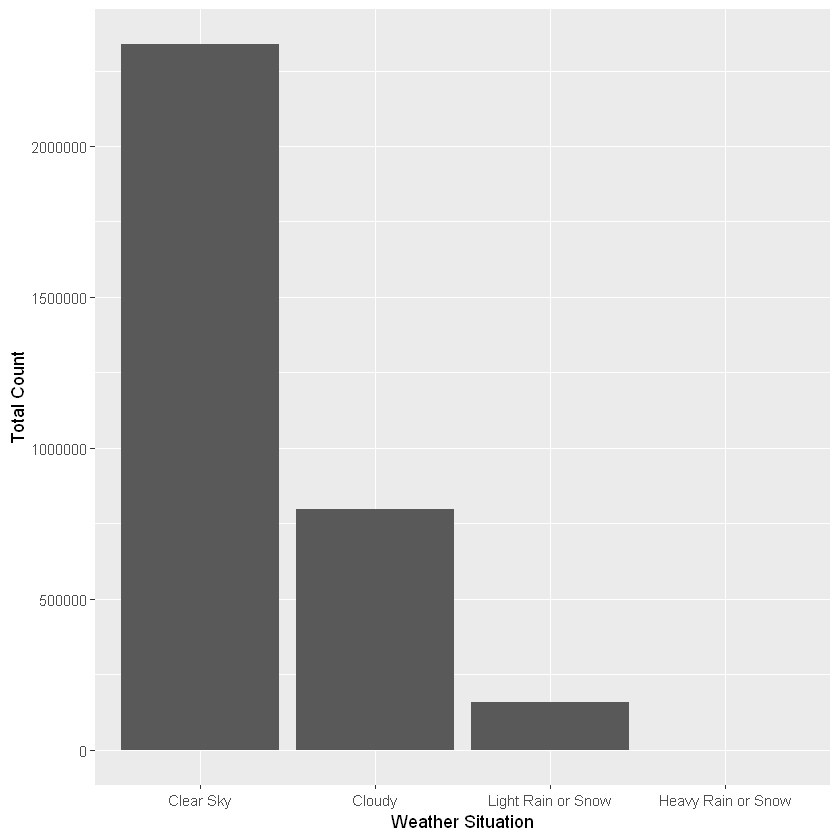

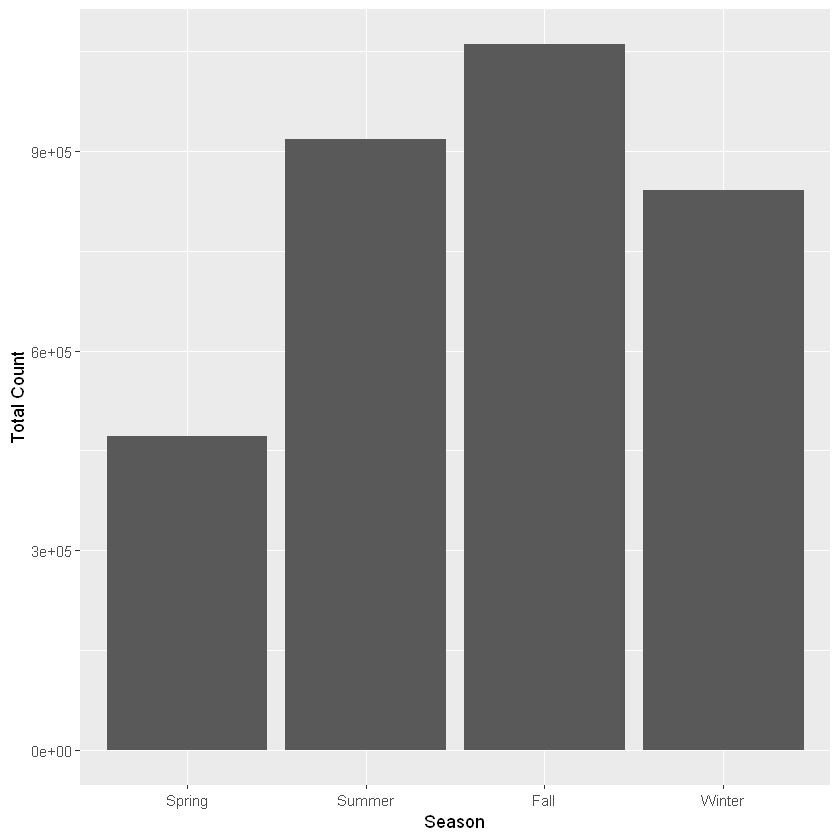

In [7]:
library(ggplot2)

bar1 =  df %>% 
  group_by(weathersit) %>%
  summarise(tot_count = sum(cnt))

ggplot(data=bar1, aes(x=weathersit, y=tot_count)) +
  geom_bar(stat="identity") + ylab('Total Count') + xlab('Weather Situation') + 
  scale_x_discrete(breaks = 1:4, labels = c('Clear Sky', 'Cloudy', 'Light Rain or Snow', 'Heavy Rain or Snow'))

bar3 = df %>% 
  group_by(season) %>%
  summarise(tot_count = sum(cnt))

ggplot(data=bar3, aes(x=season, y=tot_count)) +
  geom_bar(stat="identity")+ ylab('Total Count') + xlab('Season') + 
  scale_x_discrete(breaks = 1:4, labels = c('Spring', 'Summer', 'Fall', 'Winter'))

#### [Based on the first chart] We can see that the total number of rental bikes is high when the sky is clear. This number makes sense as more people are more likely to enjoy their day and come out when there is a clear sky. They are more inclined to go around the city and therefore use rental bikes as a means to do so. In the same way, people are more likely to stay at home or travel in a car when it is cloudy or snowing. As a result, the number of bikes rented during cloudy, rainy, or snowy days is low.

#### The same pattern described above appears in this bar chart with Season on the x-axis. More bikes are rented during the summer and fall when the temperatures are high and the skies are mostly clear compared to spring and winter. 

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"

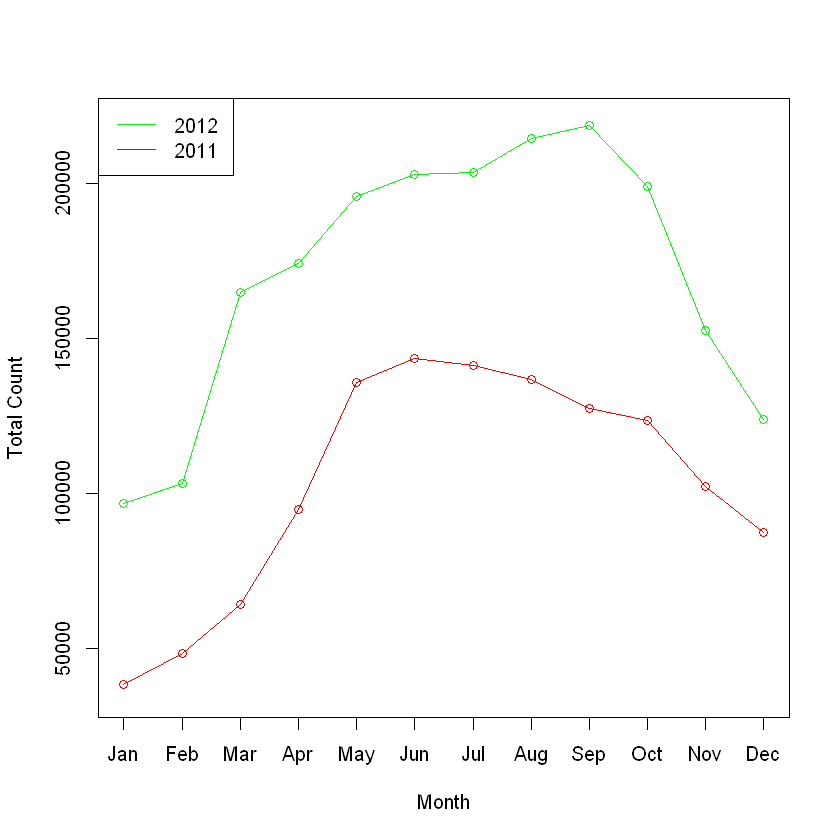

In [8]:
sumbymon_2011 <- numeric(12)
sumbymon_2012 <- numeric(12)

for(i in 1:12){
  sumbymon_2011[i] <- sum(df[df$yr== 0 & df$mnth == i,]$cnt)
}

for(i in 1:12){
  sumbymon_2012[i] <- sum(df[df$yr== 1 & df$mnth == i,]$cnt)
}

plot(sumbymon_2011, type="o", col="red" , ylim= c(35000,220000), xaxt = 'n', xlab =
       'Month',  ylab = 'Total Count')
axis(1, at = seq(1,12), labels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
lines(sumbymon_2012, type="o", col="green" , add=TRUE)
legend('topleft', c('2012', '2011'), lty = c(1,1), col = c('green', 'red') )

#### Looking at this plot, we can see more rented bikes in 2012 compared to 2011. This trend might be because people have become more aware of this bike-share system and prefer this because it is more convenient and cost-efficient. We can again see that bikes are rented more during the summer months compared to the winter months.

Warning message:
"attributes are not identical across measure variables; they will be dropped"

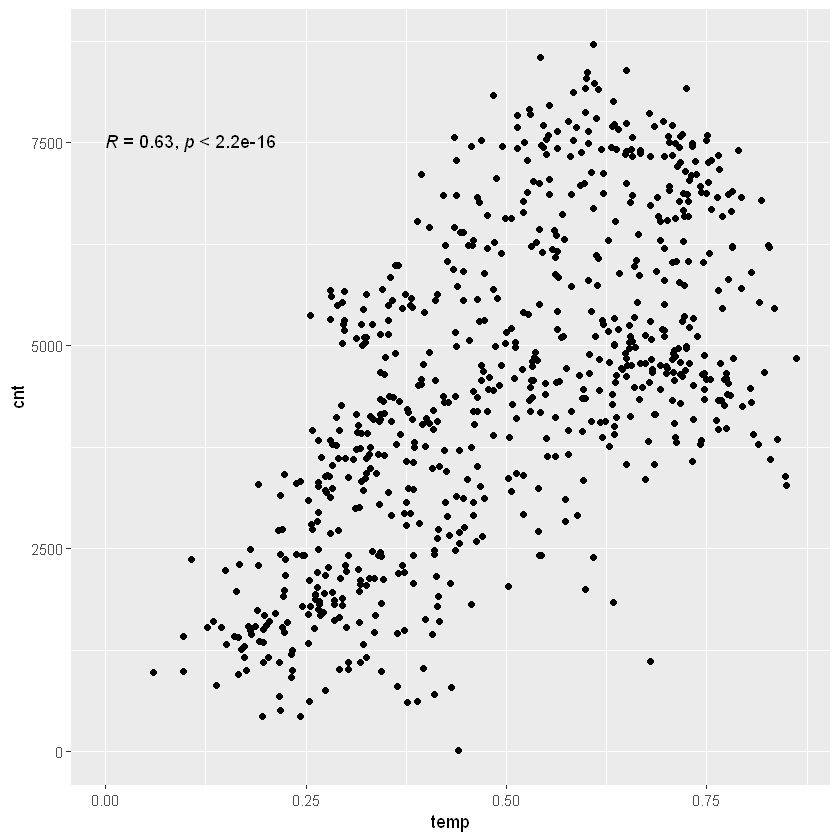

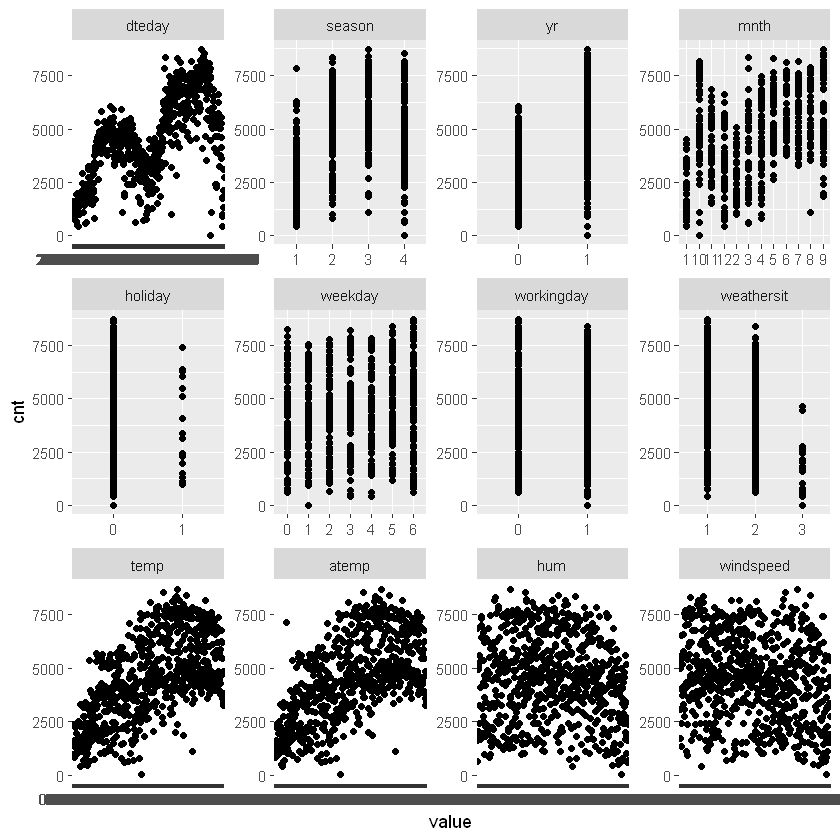

In [10]:
library(reshape2)
library(ggpubr)

data1 <- read.csv('day.csv')
df1 <- data1

df1$registered <- NULL
df1$casual <- NULL
df1$instant <- NULL

# We will be using the day.csv dataset, which has data collected daily. 
# As a result, the graph will be a simplified scatter plot where we can see the relationship more clearly.

ggplot(df1, aes( x=temp, y=cnt ))+
geom_point()+
stat_cor(method = "pearson", label.x = 0, label.y = 7500)  

# Another plot showing the relationships between variables using the day.csv dataset.

Dm <- melt(df1, id = 'cnt')
ggplot(Dm, aes(x = value, y = cnt)) + facet_wrap(~variable, scales = "free") + geom_point()

#### [Based on the first chart] As we can see, there is a positive correlation between temperature and the number of bikes rented since the Pearson coefficient is about 0.63. This correlation is significant because the p-value is less than 0.05, which means the correlation is not equal to 0. This correlation is also similar to what we found with the bar charts involving seasons and weather situations.

#### In the second chart, we see similar relationships as discussed previously in this plot as well. The number of bikes rented looks to increase as the temperature increases. More bikes are rented during the weekends and warmer months.

#### The correlation plot below will referred back when building models.

corrplot 0.92 loaded


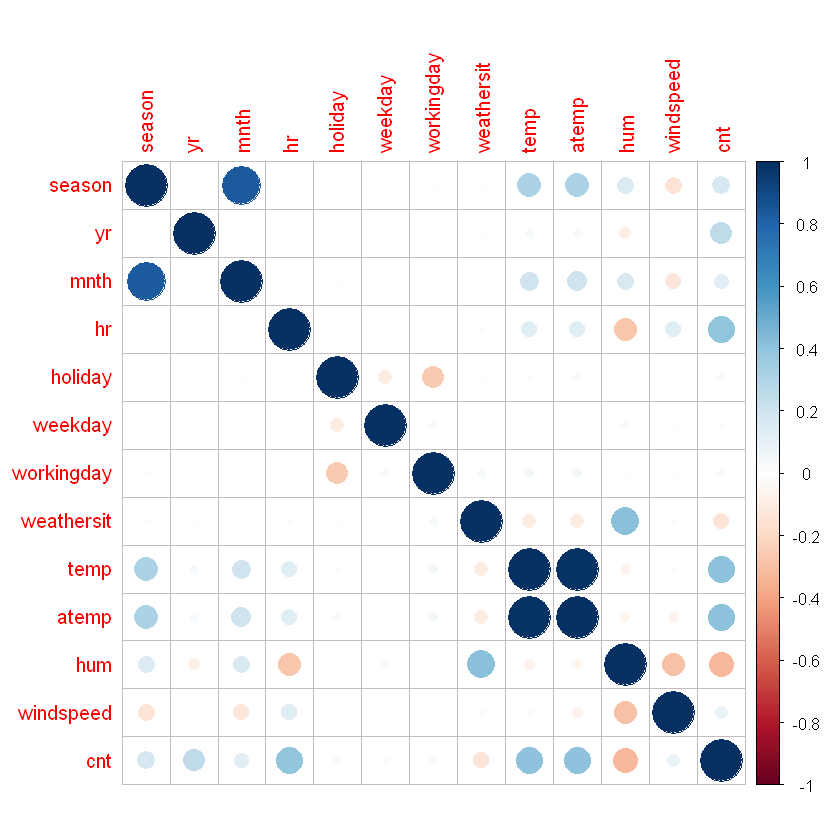

In [11]:
library(corrplot)
corrplot(cor(df_num[, c(2:14)]))

# atemp is the normalized feeling temperature in Celsius. The values are divided to 50 (max).

#### The number of rented bikes is positively correlated with atemp and negatively correlated with humidity. This makes sense as people are more likely to go out when the temperatures are high, and the air contains less humidity [less water vapor means it's easier to breath air]. 

#### There is also a positive correlation between the hour of the day and the number of rental bikes. This relation can probably be because people go out later in the day for offices or other miscellaneous work compared to early in the day.